# Simulation of dataset for analysis of  Covid 19 in Ireland

## Introduction

This project will create three random variables, 1 new_cases, 2 new_deaths, 3 new_tests, for a simulated dataframe that contains 8 variables, to analyse covid 19 in ireland. <br>
The three random variable will be based on the distrubtion of the variable in the actual dataset. <br>
The reminaing variables will be calculated from the three random varibles.<br><br>

## Investigation into the actual dataframe

To create this dataset for covid 19. Finding a datasets to analysis [1] the variable and there relation shop to each other some 
analysis of covid 19 dataset has lead to the simulation of the orgional dataset .<br/>

The index is not randomly created but is taken directly form the actual data, the index is the date.<br/>
The index is kept the same in the generated dataset.<br/><br/>

The variables are the  same as the real world. there relationship was found by doing the analysis below in appendix 1.<br/>
The simulation dataset will be based on the real world dataset.<br/>
Reproduction rate: The more infections the greater the reproduction rate.<br/>
The reproduction rate is use to show the amount of possible distruated infections that will occur if no action is taken.<br/>
The reproduction rate will is a factor or calutation of new_cases.<br/>
The real world analysis shows how the reproduction rate has grown over time.<br/>


var 1 = new_cases this cane be generated, randomly <br/>
new deaths. it can be seen that some faction of the new_case will result in new_deaths. randomally generated number based on new_cases: distubition. 
new_cases and total_cases. the new casess

### Find the distrubtions in the actual dataframe 

In [164]:
# 
def new_deaths(new_cases):
    #new_cases random number
    new_deaths = new_case / somefraction
    ddf['reproduction_rate'] = np.round(x, 2);
    return new_deaths

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import numpy as np
import sklearn.neighbors as nel
import sklearn.model_selection as mod
from scipy import stats
from numpy import random
import warnings
from fitter import Fitter

Installing a this fitter will find the distrubtion of the actual variable in the actual dataframe <br/>
https://pypi.org/project/fitter/

In [146]:
#find the distribution of the real world data
#ref= https://pypi.org/project/fitter/
def findDistrubtion(data):
    f = Fitter(data)
    f.fit()
    return f.summary()


***
### Create an Overview of the entire data set, maybe a bar chart of all data collected over time.
***

In [138]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

## Get the actual dataset
ref: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv<br/>
https://www.rte.ie/news/coronavirus/

In [139]:
#WHO report
who = pd.read_csv('owid-covid-data.csv',index_col='date')
##look at the dataset and fill all NaN's with 0
who =who.fillna(0)

In [182]:
#whoE = who.loc[who['continent'] == 'Europe']
whoE = who.loc[who['iso_code'] =='IRL']
ddf=whoE[['iso_code','continent','location','total_cases','locklevel','new_cases','total_deaths','new_deaths','total_tests','new_tests','reproduction_rate','tests_per_case','hosp_patients','icu_patients']]
df=whoE[['iso_code','continent','location','hosp_patients','icu_patients']]

#### FInd the distrubtions for of the actual variables

## Distrubtion 1: 
*****

C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


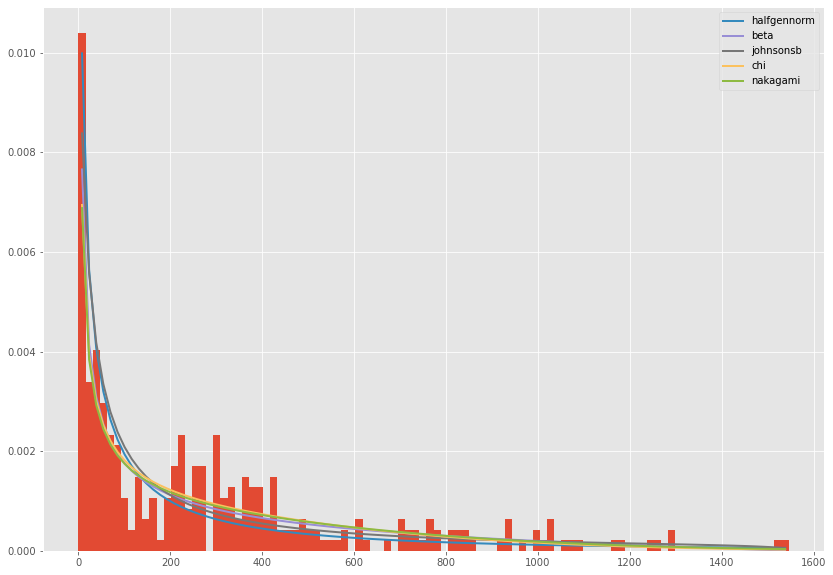

In [68]:
#find the distrubtion of each variable
findDistrubtion(ddf['new_cases']);

In distrubtion 1, new_cases this plot shows that halgennorn from the stats package<br/> scipy.stats.halfgennorm
scipy.stats.halfgennorm(*args, **kwds) = <scipy.stats._continuous_distns.halfgennorm_gen object>[source]
The upper half of a generalized normal continuous random variable.
<br/>
As an instance of the rv_continuous class, halfgennorm object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.halfgennorm.html#scipy.stats.halfgennorm <br/>
This shows that the distrubtion 1 is a gamma distrubtion. 

Numpy has also got a gamma distrubtion

Example 1: where the parameters are (Syntax : numpy.random.gamma(shape, scale=1.0, size=None)
### Using gamma() method 
gfg = np.random.gamma(3, 2, 1000)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200711163155/Screenshot20200711162300.png)

ref:https://www.geeksforgeeks.org/numpy-random-gamma-in-python/

In [151]:
#testing the gamma distrubtion ( New Cases)
gfg = np.random.gamma(300,1,305)
#parmeteres( upper bounds, lower bounds, now many)
print(len(gfg))
gfg

305


array([323.74545113, 304.44556112, 307.44598906, 305.82759027,
       284.75674813, 302.34346611, 300.79257356, 261.28937978,
       316.49368422, 311.44579583, 308.9269657 , 305.98980935,
       291.91857709, 280.85592328, 284.57029887, 259.86728024,
       293.69797849, 312.25490501, 291.56540024, 297.02229834,
       293.44369667, 303.85788464, 305.57739722, 275.05400452,
       278.88004026, 298.5940214 , 297.54358177, 314.63872964,
       295.79185599, 271.78910211, 302.09570188, 286.96280164,
       295.47339974, 273.81591377, 278.76658351, 307.32536083,
       312.5166483 , 313.70080503, 297.59602496, 285.38654954,
       302.24034453, 297.35344562, 290.59517405, 308.51570878,
       290.89832576, 300.73980872, 285.23717506, 336.52537503,
       323.80570061, 295.90883257, 285.1703829 , 290.99144714,
       326.23970442, 304.67777569, 312.85081994, 325.554415  ,
       313.48241965, 274.74822823, 293.99867604, 319.89263853,
       296.46791579, 279.1063532 , 296.54018192, 268.34

In [156]:
def new_cases():
    gfg = np.random.gamma(300,1,305)
    return gfg

### Distrubtion 2 

#### Find the distrubtion

C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determ

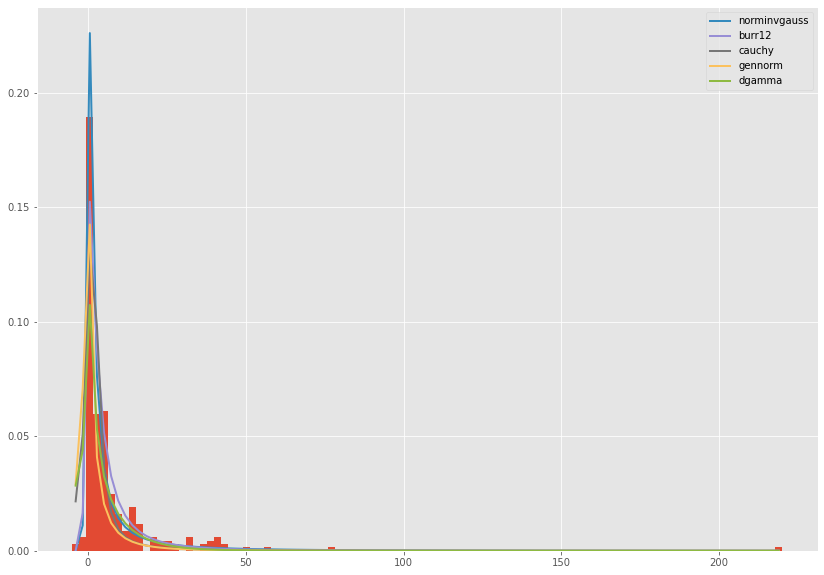

In [69]:
#find the distrubtion of each variable
findDistrubtion(ddf['new_deaths']);

The above plot shows the norninvgrass from the scipti package is the distrubtion,which is a normal inverse gaussian. <br> ref[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norminvgauss.html#scipy.stats.norminvgauss].<br> And,  numpy.random.ward is also normal inverse gaussian <br> 
The probability density function for the Wald distribution [https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.wald.html] is also.<br> 



![](https://docs.scipy.org/doc/numpy-1.15.1/_images/math/896afa9f83e7b50a14299c0f5a2b226bf50217d0.svg)

The inverse Gaussian distribution first arise from attempts to model Brownian motion.<br> It is also a competitor to the Weibull for use in reliability modeling and modeling stock returns and interest rate processes.

Syntax : numpy.random.wald(mean, scale, size=None)

Return : Return the random samples as numpy array.

In [117]:
#same code 
# Using wald() method 
gfg = np.random.wald(7.26 , 3.7, 304)
print(len(gfg))
gfg

304


array([  1.69761102,   8.51739834,   1.94614836,   3.05446976,
         2.04818737,   1.02535672,   1.34450237,   3.03589899,
        14.51360106,  22.11616433,   1.28146275,  42.71542394,
         7.64969065,   0.50029169,   2.05958616,   1.3156186 ,
         5.24943165,   0.76632968,   4.47242625,   3.80131971,
         5.40566386,   7.1550349 ,  18.42139385,   1.88870352,
         6.10350717,  39.19254436,   0.60715148,   3.27212385,
         4.96437509,   4.27805577,   8.63915889,   1.36608803,
        41.49929075,   2.53344118, 105.31270823,   4.9580188 ,
         3.93060048,   0.99138238,   8.292059  ,  23.92889853,
         2.32145795,   6.42214369,   0.58139253,   1.73905634,
        11.50409772,  18.34280765,   1.39204523,   7.6133323 ,
         3.8199573 ,  24.36117245,   6.51800823,  30.26660093,
        29.20036766,   9.47590424,   3.46328674,   6.35930837,
        11.36758847,   9.01459103,  10.07331096,   1.3733839 ,
         6.83329912,   1.02624872,   5.23225983,   1.03

In [165]:
def new_deaths():
    gfg = np.random.wald(7.26 , 3.7, 305)
    #print(gfg)
    return gfg

### Distrubition 3

C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundof

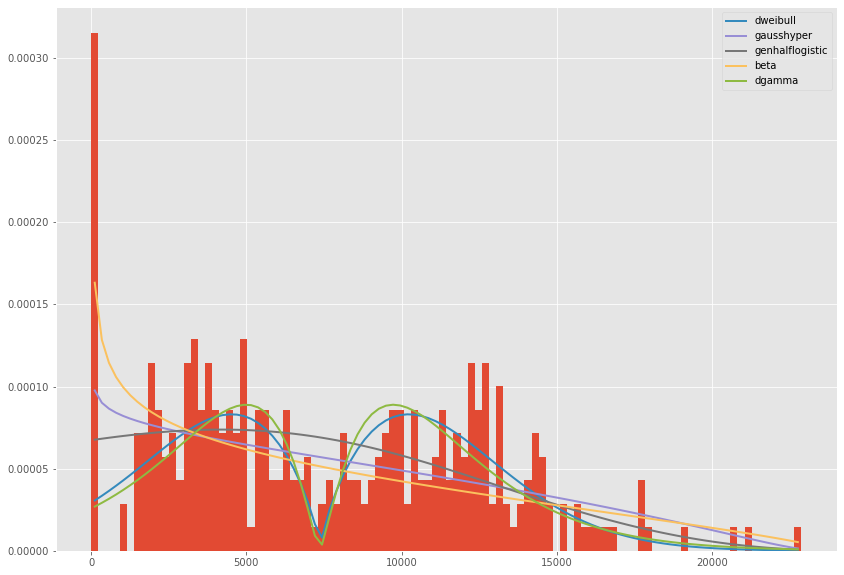

In [142]:
#find the distrubtion of each variable
findDistrubtion(ddf['new_tests']);

Ref: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.weibull.html

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull

The Weibull (or Type III asymptotic extreme value distribution for smallest values, SEV Type III, or Rosin-Rammler distribution) is one of a class of Generalized Extreme Value (GEV) distributions used in modeling extreme value problems. This class includes the Gumbel and Frechet distributions.

The probability density for the Weibull distribution is

p(x) = \frac{a} {\lambda}(\frac{x}{\lambda})^{a-1}e^{-(x/\lambda)^a},

where a is the shape and \lambda the scale.

The function has its peak (the mode) at \lambda(\frac{a-1}{a})^{1/a}.

When a = 1, the Weibull distribution reduces to the exponential distribution

In [143]:
# code example
# weibull does not seem to be correct
#gfg = np.random.wald(7531.809836065574, 21000, 304)
gfg = np.random.weibull(21000,305)
print(len(gfg))
gfg

305


array([0.99998342, 0.999934  , 0.99998694, 0.99993646, 1.00001788,
       0.99989913, 0.99996896, 0.99965174, 1.00001162, 0.99992293,
       1.00003575, 1.0000262 , 0.99994497, 0.99997733, 1.00002732,
       0.99994124, 0.99997346, 1.00003884, 0.99995925, 1.00001068,
       0.99999984, 1.00003401, 1.00001542, 0.99992927, 0.99998294,
       0.99996266, 0.99996621, 0.99999046, 0.99997742, 0.9998982 ,
       0.9999744 , 1.00000535, 0.99977942, 1.00001612, 0.99997429,
       1.00003508, 0.99995544, 0.99992226, 1.00001759, 0.99996705,
       0.99988313, 1.00001343, 0.99993035, 0.99988279, 1.00000753,
       0.99997742, 1.00003081, 0.99983942, 1.00002946, 1.00001794,
       1.0000128 , 1.00002523, 0.99996008, 0.99986256, 0.99998707,
       1.00001361, 0.99986861, 1.00005429, 1.0000607 , 0.99999702,
       0.99989524, 1.00001572, 0.99983418, 1.00001173, 0.99991736,
       0.99989083, 1.00007035, 0.9999249 , 0.99993406, 0.9999642 ,
       1.00000115, 1.00003504, 0.99994729, 0.99995749, 1.00000

In [173]:
# code example
# weibull does not seem to be correct as wald
gfg = np.random.wald(7531.809836065574, 21000, 305)
#gfg = np.random.weibull(50000,305)
print(len(gfg))
#gfg

305


In [174]:
def new_tests():
    gfg = np.random.wald(7531.809836065574, 21000, 305)
    return gfg

### find the distruibution of the new_death

C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\G00387859\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The maxim

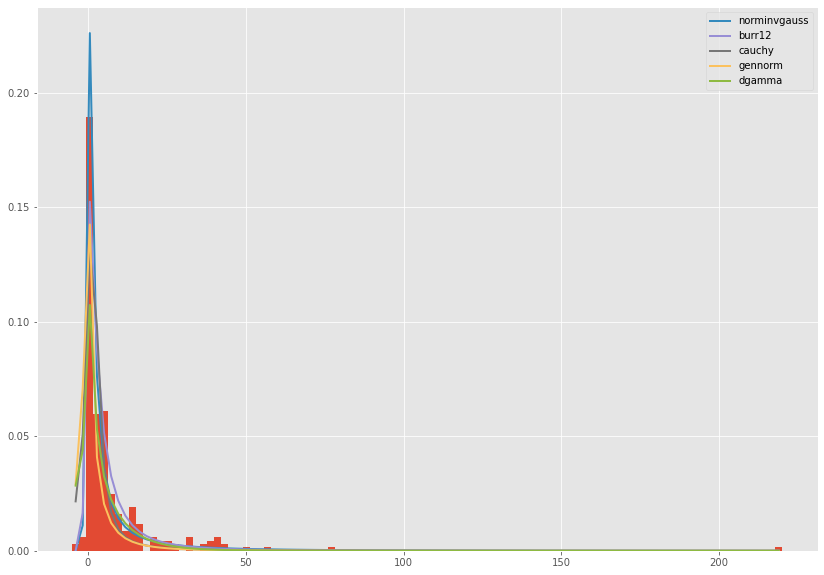

In [74]:
#find the distrubtion of each variable
findDistrubtion(ddf['new_deaths']);

ref: norminvgauss https://www.geeksforgeeks.org/python-normal-inverse-gaussian-distribution-in-statistics/#:~:text=Python%20%E2%80%93%20Normal%20Inverse%20Gaussian%20Distribution%20in%20Statistics,methods%20as%20an%20instance%20of%20the%20rv_continuous%20class.


New_deaths is a factor of new_case

The analysis shows that norminvgauss is found to be the distrubtion for new_deaths, but as cauchy is extremely close to norminvgauss so I will use cauchy for each variable.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190318125634/cauchy.jpg)

In [39]:
#compare the distruiption 
from scipy.stats import halfcauchy

def compareDist(i):
    if i == 1:
        gfg = np.random.standard_cauchy(100000) 
    if i == 2:
        gfg = np.random.standard_cauchy(100000)
    gfg = gfg[(gfg>-25) & (gfg<25)] 
    plt.hist(gfg, bins = 100, density = True) 
    return plt.show()
        
    
    

### np.random.standard_normal vs np.random.standard_cauchy

In [37]:
#rv = cauchy()
s= np.random.standard_cauchy(size=305);
for i in range(len(s)):
    if s[i] < 0:
        s[i] = s[i]*-1
        #s[i] = s[i] *1

    
s = np.round(s)
print(len(s))

ddf["dmNewDeaths"] =s
#s

305


<ipython-input-37-1f067bb0bb90>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["dmNewDeaths"] =s


In [38]:
#rv = cauchy()
s= np.random.standard_normal(size=305);
for i in range(len(s)):
    if s[i] < 0:
        s[i] = s[i]*-1
        #s[i] = s[i] *1

    
s = np.round(s)
print(len(s))

ddf["dmNewDeaths"] =s
#s

305


<ipython-input-38-c468b5ccc4e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["dmNewDeaths"] =s


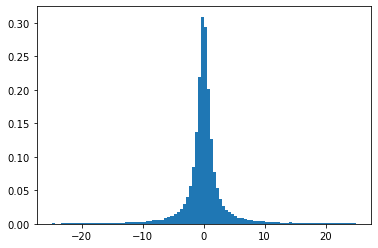

In [40]:
compareDist(1)

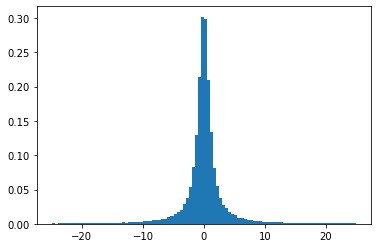

In [41]:
compareDist(2)

In [46]:
# this dist new cases in half_cauchy which is not present in numpy package but in stat package. The closest is standard_cauchy
s = np.random.standard_cauchy(305) 
## loop over the ndarry and multipy negitivate values by -1 to make positive
for i in range(len(s)):
    if s[i] < 0:
        s[i] = s[i]*-1
print(type(s))
s = s[s>0]
s = np.around(s)
#print(s)
ddf["DmGenNew_cases"] =s


<class 'numpy.ndarray'>


<ipython-input-46-b64484c81cc8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["DmGenNew_cases"] =s


### Comparing the distrubtions

The three/two distrubtion choosen from the analysis. <br>
1. gfg = np.random.gamma(300,1,305)
2. gfg = np.random.weibull(21000,305)
3. gfg = np.random.wald(7.26 , 3.7, 304)


In [210]:
def compareDist():
    shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
    gf1 = np.random.gamma(shape, scale, 1000)
    
    a = 2. # shape
    gf2 = np.random.weibull(a, 1000)
    gf3 = np.random.wald(2, 2, 1000)
    
    #gf1 = np.random.gamma(30000)
    #gf1 = gf1[(gf1>-25) & (gf1<25)] 
    #gf2 = np.random.weibull(30000)
    #gf2 = gf2[(gf2>-25) & (gf2<25)] 
    #gf3 = np.random.wald(300000)
    #gf3 = gf3[(gf3>-25) & (gf3<25)] 
    plt.hist(gf1, bins = 10, density = True) 
    plt.hist(gf2, bins = 10, density = True)
    plt.hist(gf3, bins = 10, density = True)
    return plt.show()

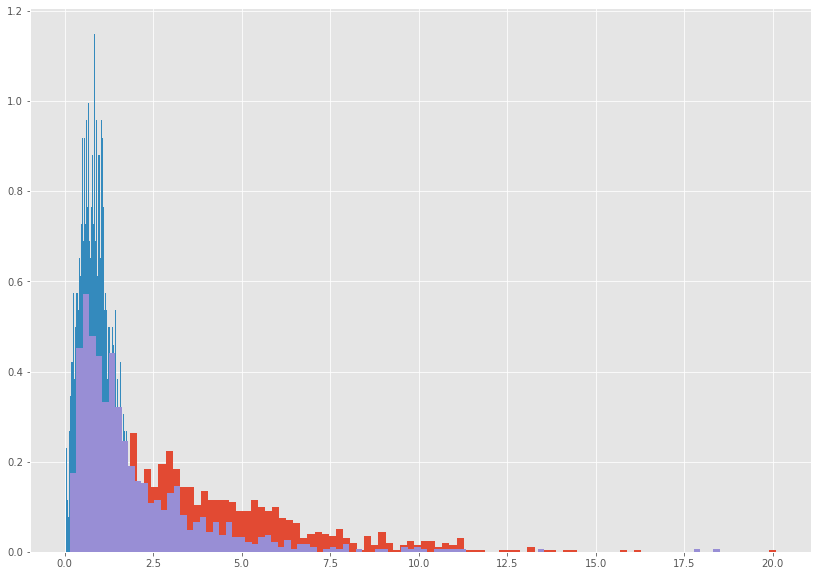

In [209]:
compareDist()

### Build the dataset

    add new cases to the dataset df
    
    

In [152]:
df['new_cases']= new_cases()

<ipython-input-152-7db55be4fe12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_cases']= new_cases()


In [175]:
df['new_tests'] = new_tests()

<ipython-input-175-09ab40f3d2f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_tests'] = new_tests()


In [176]:
df

,iso_code,continent,location,hosp_patients,icu_patients,new_cases,new_dead,new_tests
date,,,,,,,,
29/02/2020,IRL,Europe,Ireland,0.0,0.0,278.738286,7.887488,15357.896592
01/03/2020,IRL,Europe,Ireland,0.0,0.0,297.618959,14.587171,6494.733682
02/03/2020,IRL,Europe,Ireland,0.0,0.0,306.852344,5.335040,2433.513952
03/03/2020,IRL,Europe,Ireland,0.0,0.0,314.186424,25.025894,14975.648858
04/03/2020,IRL,Europe,Ireland,0.0,0.0,315.901815,1.937590,10735.111042
...,...,...,...,...,...,...,...,...
25/12/2020,IRL,Europe,Ireland,0.0,0.0,321.946430,5.964554,4632.799655
26/12/2020,IRL,Europe,Ireland,0.0,0.0,302.266524,3.865207,3628.423015
27/12/2020,IRL,Europe,Ireland,0.0,0.0,337.223504,28.795054,9350.730236


In [162]:
warnings.filterwarnings('ignore')
#loc = mean or center of the distrubtion. 
x= random.normal(loc=2.34, size=305)
df['reproduction_rate'] = np.round(x, 2);


In [166]:
#add new_deaths to the dataframe
df['new_dead'] = new_deaths()

<ipython-input-166-3a19c0cae3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_dead'] = new_deaths()


### Add calculated variables 

In [187]:
# reproduction rate is very diffcult to calculate.
df['reproduction_rate'] = ddf['reproduction_rate']



<ipython-input-187-52b5cdb2e355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lockLevel'] = ddf['locklevel']
<ipython-input-187-52b5cdb2e355>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reproduction_rate'] = ddf['reproduction_rate']


In [189]:
def reproduction_rate():
    df.loc[df['reproduction_rate'] >2 , 'lockLevel'] = '5'
    df.loc[df['reproduction_rate'] <0.8 , 'lockLevel'] = '1'
#ddf.loc[ddf['reproduction_rate'] >0.8 & < 1.2 , 'lockLevel'] = '2'
#ddf.loc[ddf['reproduction_rate'] >1.2 & ddf['reproduction_rate'] < 1.5 , 'lockLevel'] = '3'
#ddf.loc[ddf['reproduction_rate'] >1.5 & ddf['reproduction_rate'] < 2 , 'lockLevel'] = '4'
    df.loc[(df['reproduction_rate'] > 0.8) & (df['reproduction_rate'] < 1.2), 'lockLevel'] = '2'
    df.loc[(df['reproduction_rate'] > 1.2) & (df['reproduction_rate'] < 1.5), 'lockLevel'] = '3'
    df.loc[(df['reproduction_rate'] > 1.5) & (df['reproduction_rate'] < 2), 'lockLevel'] = '4'
    

In [191]:
df

,iso_code,continent,location,hosp_patients,icu_patients,lockLevel,reproduction_rate
date,,,,,,,
29/02/2020,IRL,Europe,Ireland,0.0,0.0,0.0,0.0
01/03/2020,IRL,Europe,Ireland,0.0,0.0,5.0,0.0
02/03/2020,IRL,Europe,Ireland,0.0,0.0,5.0,0.0
03/03/2020,IRL,Europe,Ireland,0.0,0.0,5.0,0.0
04/03/2020,IRL,Europe,Ireland,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...
25/12/2020,IRL,Europe,Ireland,0.0,0.0,3.0,0.0
26/12/2020,IRL,Europe,Ireland,0.0,0.0,3.0,0.0
27/12/2020,IRL,Europe,Ireland,0.0,0.0,3.0,0.0


What is the relationship between the variables choosen here. LockLevel= based on the date it will have a range of between 1 and 5, while the locklevel is a stand alone variable, it would seem that the decresease in locklevel will increase when the reproduction_rate increases, this will affect  new_case, new_deaths etc actuall the majortity of the varibles are affected if the lockdown level is decreased. The reproduction rate is no generated here. 

# Appendix 

## Analysis 

### Data overview:

Creating functions

In [114]:
# mean, average and median function
def meanMedianMode(dataset,name):
    #mean = statistics.mean(dataset)
    mean = np.mean(dataset)
    #median = statistics.median(dataset)
    median = np.median(dataset)
    #mode = statistics.mode(dataset)
    #npArray = dataset.to_numpy()
    mode = stats.mode(dataset.values)
    #stats.mode(a)

    print( name.upper(),":\nThe mean is ",mean,"\nThe Mode is ",mode, "\nAnd median is ",median)
    

##### Total deaths vs total cases

This section discusses the total deaths, the total cases and the reproduction rate.  

Plotting the total deaths.

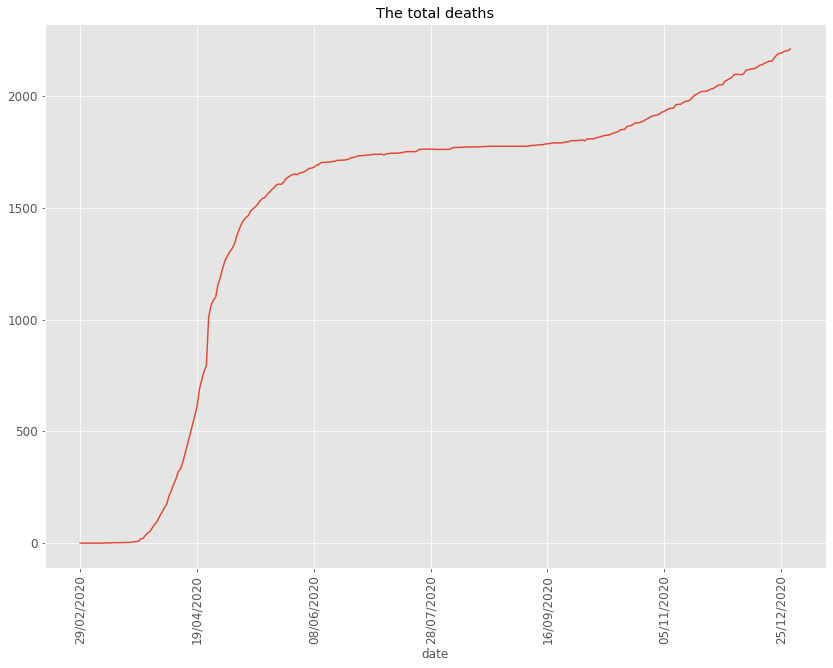

In [7]:
td= ddf['total_deaths']
my_plot=td.plot(rot=90,fontsize=12,title="The total deaths",grid=True)

The above figure show the total deaths over the period jan to end of November. The amount of people that have died in Ireland is approximatley 2100.

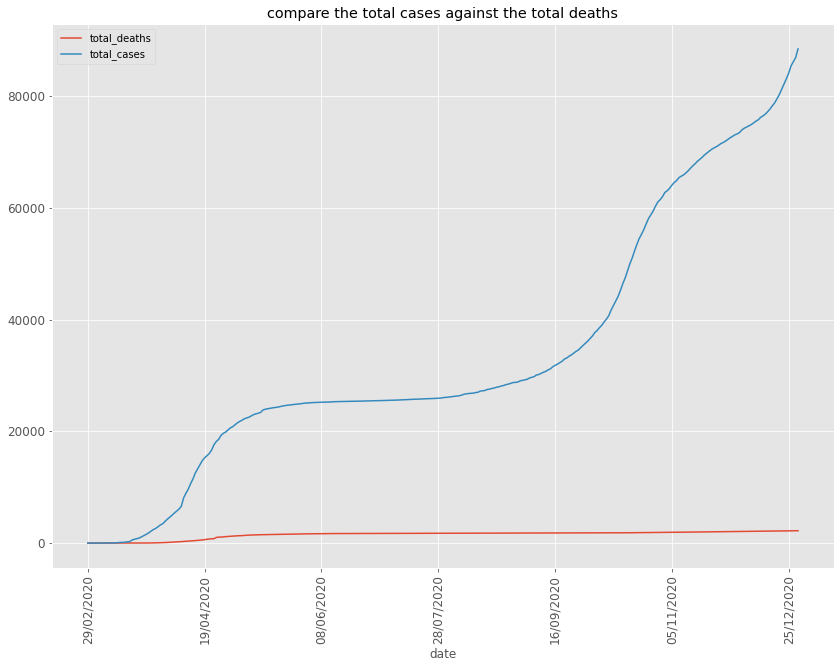

In [15]:
tdVsTc= ddf[['total_deaths','total_cases']]
my_plot=tdVsTc.plot(rot=90,fontsize=12,title="compare the total cases against the total deaths",grid=True)

The figure above show the total deaths vs the total cases. Even though there are many new cases the total deaths are not following the same trend.

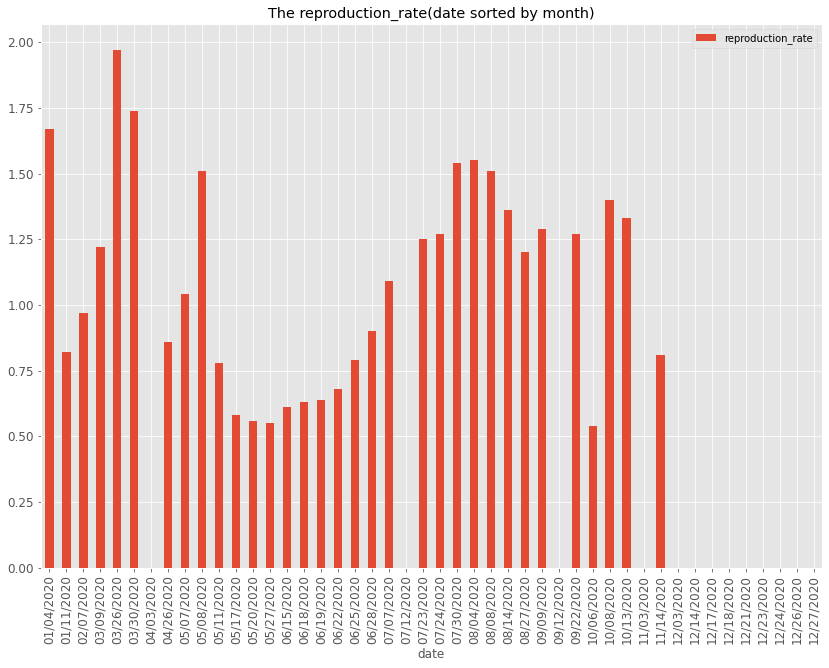

In [74]:
from matplotlib.dates import DateFormatter
#get the reproduction rate , the index date comes by default
tc= ddf[['reproduction_rate']]
# the problem is that if I plot now i get a very mashed up plot
# so I need to only get a sample , but first I need to sort the date index column by month, because I want the plot to be over the year
# Convert the date index column to datetime
ddf.index = pd.to_datetime(ddf.index)
# then formate the index date to month day year
tc.index = ddf.index.strftime('%m/%d/%Y')
# now take a sample looks like per week = .15
rows = tc.sample(frac = .15)
# but I need to sort , that why I changed the format, because the sort will sort on the first date at index [0].
rows.sort_index()
sort1 = rows.sort_values(by=['date'])
# now plot the result
sort1.plot(kind='bar',rot=90,fontsize=12,title="The reproduction_rate(date sorted by month)",grid=True);

The above figure shows the reproduction rate. The reproduction rate or R number basically put, it’s a way of measuring an infectious disease’s capacity to spread. The R number signifies the average number of people that one infected person will pass the virus to. The figure shows that for Ireland in the begining started a about 2.6 meaning that for every one person infected that 2.6 people will be infected as a result of that one person.

### New cases vs Lock down level

The plot below shows dataset the new_case vs the locklevel. The new cases that have been report but is not cumilivate per week and the locklevel is the level of restriction durning the week of the covid cases. The red line show the locklevel and the bar chart show the new_case reported to the world health orginisation. The index is set to week column. The red line superimposed on the barchart given visual represation of how the restriction has affected the contracting of covid 19. I can be seen that restrictions help to reducts the contraction of covid 19. No suprise there then. 

C:\Users\G00387859\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


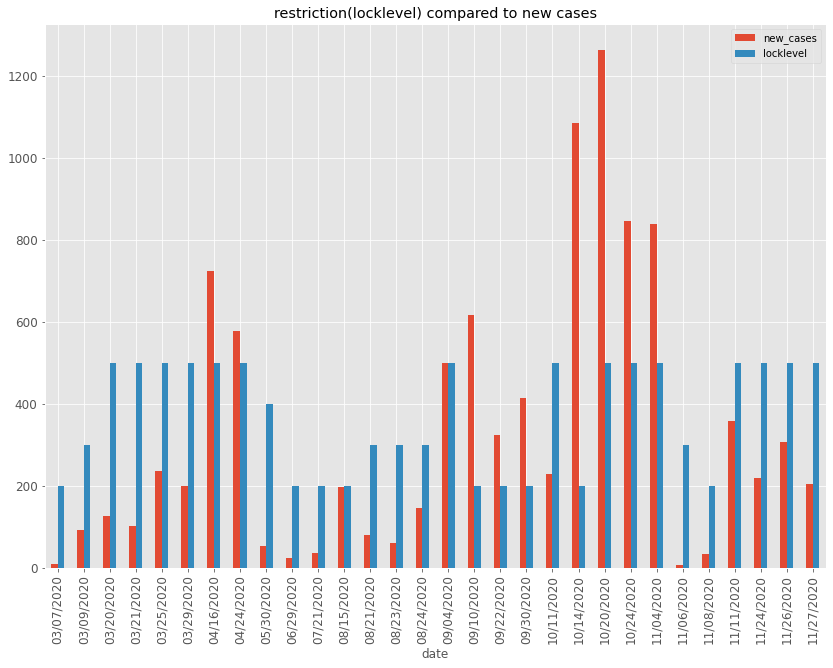

In [17]:
from matplotlib.dates import DateFormatter
#get the reproduction rate , the index date comes by default
ddf.index = pd.to_datetime(ddf.index)
td= ddf[['new_cases','locklevel']]
td.locklevel = td.locklevel *100
#td.iloc[:, 1] = td.iloc[:, 1]*200


#ddf.index = pd.to_datetime(ddf.index)
td.index = ddf.index.strftime('%m/%d/%Y')
rows = td.sample(frac = .10)
rows.sort_index()
sort1 = rows.sort_values(by=['date'])

#td1.index = ddf.index.strftime('%m/%d/%Y')
#rows1 = td1.sample(frac = .10)
#rows1.sort_index()
#sort2 = rows.sort_values(by=['date'])

my_plot=sort1.plot(kind='bar',rot=90,fontsize=12,title="restriction(locklevel) compared to new cases")


##### Get the mean median and mode

In [44]:
meanMedianMode(ddf["new_cases"],"new_cases")

NEW_CASES :
The mean is  289.9639344262295 
The Mode is  ModeResult(mode=array([0.]), count=array([6])) 
And median is  212.0


In [116]:
meanMedianMode(ddf['new_deaths'],"new_deaths")

NEW_DEATHS :
The mean is  7.255737704918033 
The Mode is  ModeResult(mode=array([0.]), count=array([89])) 
And median is  2.0


Standard deviation

In [201]:
import statistics

std=statistics.stdev(ddf["new_cases"])
print('New Cases: Most of the values are within the range of {} from the mean value, which is {}'.format(std,261))

New Cases: Most of the values are within the range of 318.2376150238188 from the mean value, which is 261


Prediction: K nearest. How many deaths potentailly will there be based on historical data.

In [202]:
input=ddf[["new_cases","total_cases"]]
output=ddf["new_deaths"]

In [203]:
knn=nel.KNeighborsClassifier(n_neighbors=5)

In [204]:
knn.fit(input,output);

The k nearest neighbour value predict the potental number of death

In [205]:
result = knn.predict([[346,500000]])

In [206]:
res = result[0]

In [211]:
print("Predicted Deaths: ",res)

Predicted Deaths:  1.0


Train the model

In [212]:
input_train,input_test,output_train,output_test = mod.train_test_split(input,output, test_size=0.33)

In [213]:
knm=nel.KNeighborsClassifier(n_neighbors=5)

In [214]:
knm.fit(input_train,output_train);

In [215]:
(knm.predict(input_test)== output_test).sum()

33

In [220]:
from statistics import mean
t_result = knm.predict(input_test)
avr = mean(t_result)
print("Predicted Deaths array:",t_result,"\nPredicted Deaths: ",avr)

Predicted Deaths array: [ 0.  0.  0.  0. 14.  0.  2. 10.  2.  8.  1. 25.  3.  0.  1.  3.  0.  0.
 16.  0.  0.  8.  0.  1.  1.  0.  0.  4.  5.  1.  3.  3.  3.  0. 12.  0.
  0.  0. 14.  0.  0.  0.  5.  1.  3.  2.  0.  5.  0.  1.  2.  0. -5.  0.
 -2.  1.  0.  9.  0.  1.  0.  1.  4. 16. 14.  3. 15. -5. -5.  1.  0.  3.
  0.  1.  9. -2.  0.  0.  9.  3.  0.  3.  0. 25.  2.  3.  0.  0.  6.  0.
 41.  3.  1.  0.  0.  0.  4. 12.  0.  8.  4.] 
Predicted Deaths:  3.386138613861386


#### Linear Regression
To make Predictions of how many people could die of Covid 19 


In [221]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [222]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [223]:

#x=df[["speed","power"]]
#y=df["power"]
x=ddf[["new_cases","total_cases"]]
y=ddf["new_deaths"]

In [224]:
m.fit(x,y)

LinearRegression()

In [225]:
m.score(x,y)

0.12837741180169993

In [226]:
z = ddf['new_cases']
q = ddf['new_deaths']

In [227]:
np.polyfit(z,q,1)

array([0.01201608, 3.77150889])

In [228]:
m,c =np.polyfit(z,q,1)

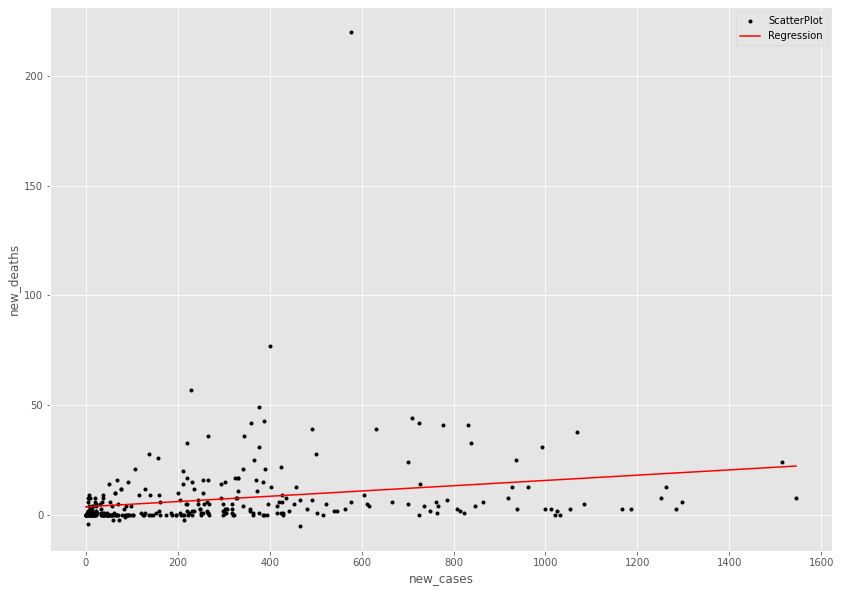

In [229]:
plt.plot(z, q, 'k.',label="ScatterPlot")
#y=ax**2+bx+c, quadratic 
plt.plot(z, m * z + c, 'r-',label="Regression")
plt.xlabel("new_cases")
plt.ylabel("new_deaths")
plt.legend(loc="best")

The above figure show the new case vs the new deaths. It would seem that if 800 new cases were to be found in ireland then, just over 10 new deaths would occur.

### Analysis of Deaths

Total deaths 2213.0


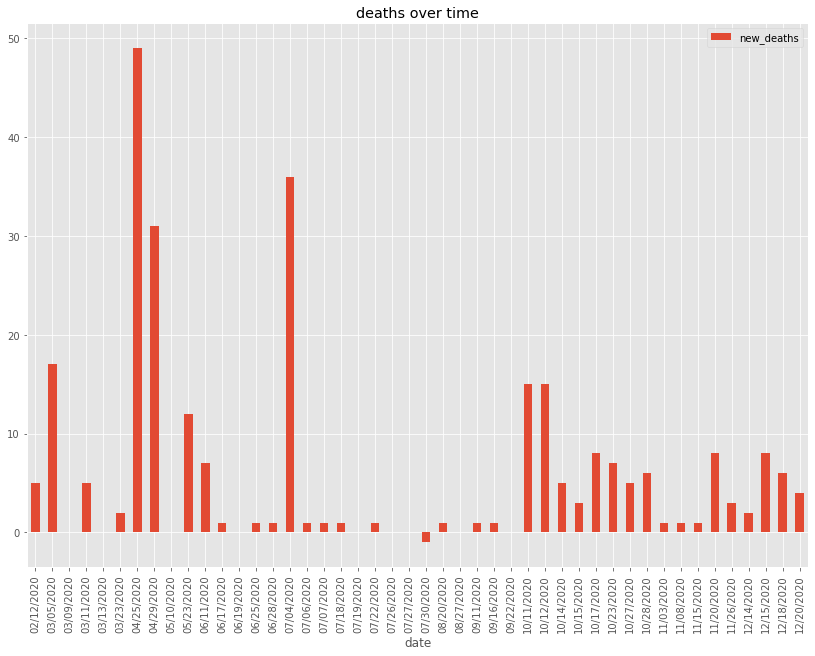

In [271]:
tds = ddf['total_deaths']
tdss=ddf[['new_deaths']]
#using pandas plot the data from the new_case and locklevel columns 
#first to be plotted is new_cases per week on a bar chart where the x axis label is rotated by 90 degrees
#my_plot=tds.plot(figsize=(15,10),rot=90,fontsize=12,color="blue")

ddf.index = pd.to_datetime(ddf.index)
tdss.index = ddf.index.strftime('%m/%d/%Y')
rows = tdss.sample(frac = .15)
rows.sort_index()
sort3 = rows.sort_values(by=['date'])


my_plot=sort3.plot(kind='bar',rot=90,title="deaths over time",grid=True)
my_plot.legend(["new_deaths"]);
colLen = len(ddf['total_deaths'])
print("Total deaths", ddf['total_deaths'].iloc[-1])

The figure above shows how many the deaths that have occured over the period march to december. The deaths spiked between 05-04-2020 and 10-05-2020. This is because there was an outbreak in nursing homes. ref(http://edepositireland.ie/handle/2262/92815)

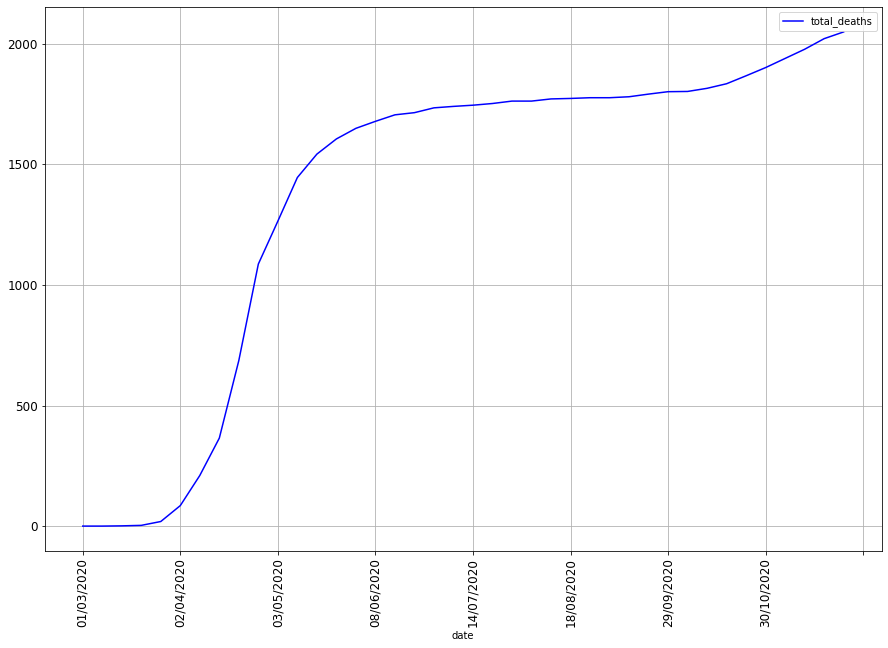

In [190]:
tds = ddf['total_deaths']
tdss=ddf['new_deaths']
#using pandas plot the data from the new_case and locklevel columns 
#first to be plotted is new_cases per week on a bar chart where the x axis label is rotated by 90 degrees
my_plot=tds.plot(figsize=(15,10),rot=90,fontsize=12,color="blue",grid=True)
#my_plot=tdss.plot(color="red",rot=90,figsize=(15,10),title="deaths per week from the start")
my_plot.legend(["total_deaths"]);

The figure above shows the total deaths per week since march to december. The total deaths a just over 2000.

In [45]:
meanMedianMode(ddf["new_deaths"],"new_deaths")

NEW_DEATHS :
The mean is  7.255737704918033 
The Mode is  ModeResult(mode=array([0.]), count=array([89])) 
And median is  2.0


In [123]:
meanMedianMode(ddf["new_tests"],"new_tests")

NEW_TESTS :
The mean is  7531.809836065574 
The Mode is  ModeResult(mode=array([0.]), count=array([22])) 
And median is  6758.0


#### new_tests vs new_cases

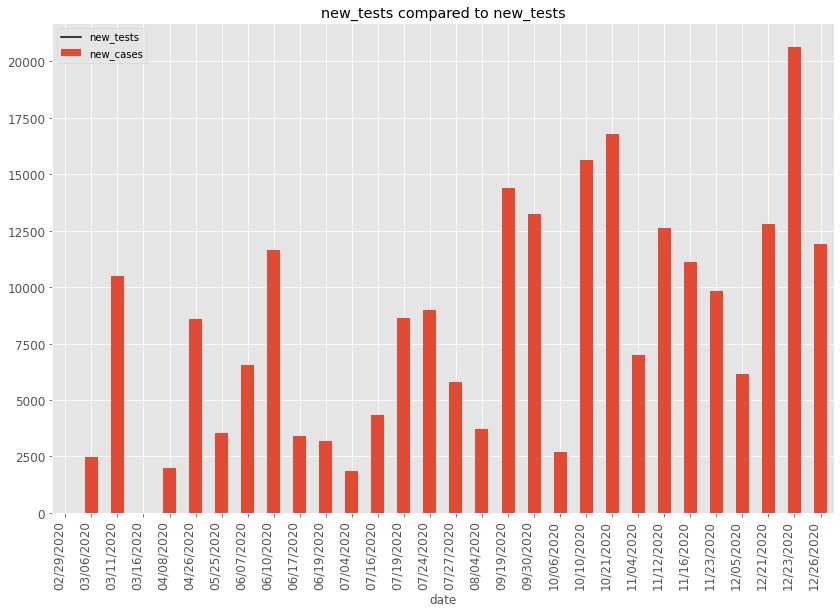

In [64]:
#get the columns new_test and new cases
nTarr = ddf[['new_tests']]
nC_arr= ddf['new_cases']

#using pandas plot the data 
ddf.index = pd.to_datetime(ddf.index)
nTarr.index = ddf.index.strftime('%m/%d/%Y')
rows = nTarr.sample(frac = .10)
rows.sort_index()
sort4 = rows.sort_values(by=['date'])

my_plot=sort4.plot(kind='bar',rot=90,fontsize=12,title="new_tests compared to new_tests")
my_plot=nC_arr.plot(kind='line',color="black",rot=90,grid=True)
my_plot.legend(["new_tests", "new_cases"]);

It would seem that there is little or no corralation between the amount of test undertaken and the confirmed new cases per week.

To get a positive test how many tests were carried out.tests_per_case 

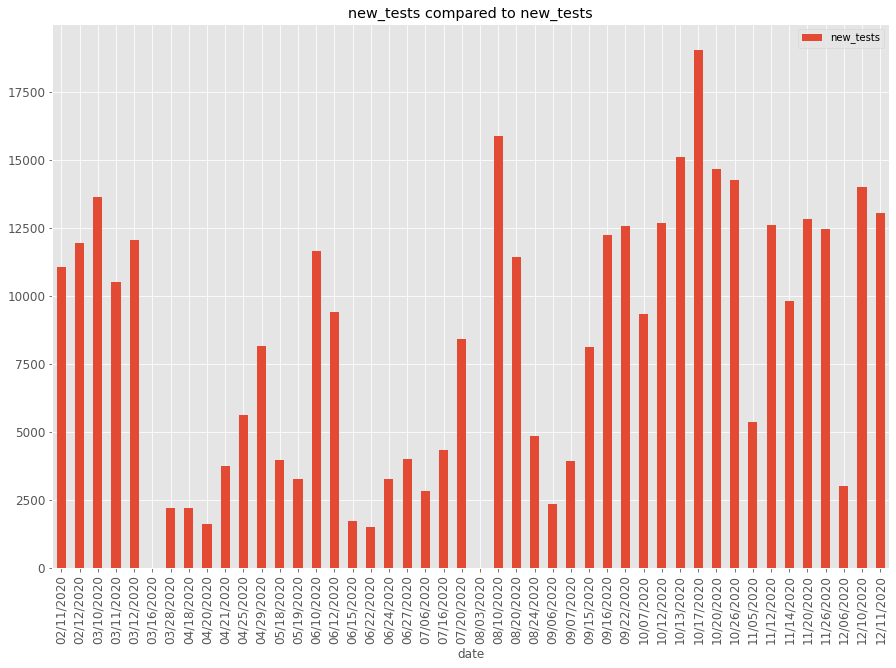

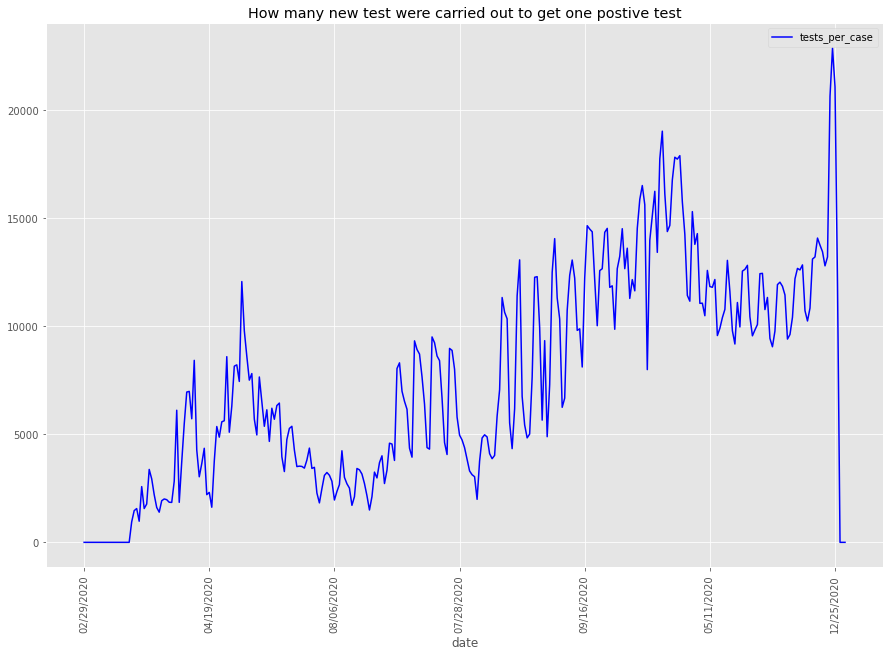

In [69]:
#get the columns new_test and new cases
close_arr = ddf[['new_tests']]
close_arr1=ddf['tests_per_case']

ddf.index = pd.to_datetime(ddf.index)
close_arr.index = ddf.index.strftime('%m/%d/%Y')
rows = close_arr.sample(frac = .15)
rows.sort_index()
sort5 = rows.sort_values(by=['date'])

#using pandas plot the data 
my_plot=sort5.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="new_tests compared to new_tests",grid=True)
my_plot=close_arr.plot(color="blue",rot=90,grid=True,figsize=(15,10),title="How many new test were carried out to get one postive test")
my_plot.legend(["tests_per_case"]);

The figure above shows the amount of tests conducted to get a postive test in Ireland it can be seen that towards the end of 2020 that much more testing was conducted. 

### ICU patients Vs total cases

The analysis that the confirmed cases of covid 19 are based on the cases reported and that the test carried out were done because the individual showed the correct symptomes of covid 19 at the time.  

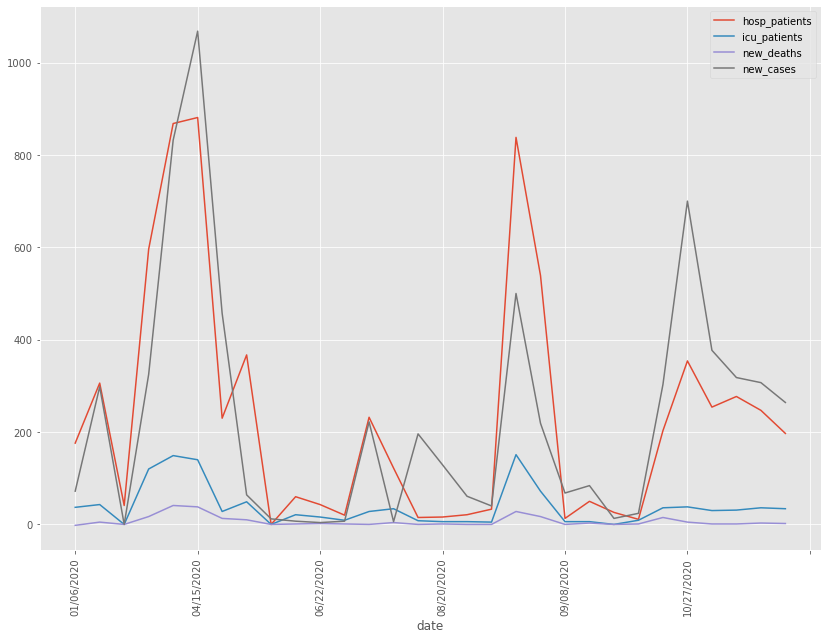

In [113]:
#get the columns new_test and new cases
ddf.index = pd.to_datetime(ddf.index)
strtime = ddf.index.strftime('%m/%d/%Y')

close_arr = ddf[['hosp_patients','icu_patients','new_deaths','new_cases']]
close_arr.index = strtime
rows = close_arr.sample(frac = .10)
rows.sort_index()
close_arr = rows.sort_values(by=['date'])

#close_arr1=ddf['icu_patients']
#close_arr1.index = strtime
#rows = close_arr1.sample(frac = .10)
#rows.sort_index()
#close_arr1 = rows.sort_values(by=['date'])

#close_arr2=ddf['total_cases']
#close_arr2.index = strtime
#rows = close_arr2.sample(frac = .10)
#rows.sort_index()
#close_arr2 = rows.sort_values(by=['date'])




#using pandas plot the data
#my_plots=[['close_arr','close_arr1','close_arr2','close_arr3']]
#my_plot.add_trace(close_arr3.plot(color='blue',rot=90))
#close_arr2.plot(color="green",rot=90)
#close_arr1.plot(rot=90)
close_arr.plot(rot=90,grid=True,title="")
#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#ax1.plot(close_arr)
#ax1.plot(close_arr1)
#ax1.plot(close_arr2)
#ax1.plot(close_arr3)
#ax1.legend(["hosp_patients","icu_patients","total_deaths","new_cases"]);
my_plot.legend(["hosp_patients","icu_patients","new_deaths",'new_cases']);

The above figure shows patients in hosiptal , icu patients and total deaths. While there is a corralation between icu patients and patient in hostiptal its unclear if there is deaths associated to patients in hosiptal. 